### 1. 梯度下降法

1). 这并不是一种机器学习算法；  
2). 是一种基于搜索的最优化方法；  
3). 作用：最小化一个损失函数；  
4). 梯度上升法：最大化一个效用函数。

梯度下降法示意图如下图所示：

![](https://image.slidesharecdn.com/scalablemachinelearning-170325022554/95/scalable-machine-learning-27-638.jpg?cb=1490408939)

纵轴是参数，横轴是损失函数（一般写为$\theta$和$J$)。损失函数的导数可以表示方向，原来的损失函数减去一个很小的数字（一般表示为$\eta$，图中为$\alpha$)乘以导数，就是下一个点的损失函数。当导数为0时，就到了最低点，也就是损失函数的最小值，这里就是我们的最优模型。

1). 图中的$\alpha$ (或者表示为$\eta$)被称为学习率 (learning rate)；  
2). 这个值影响获得最优解的速度（如果太小，会影响收敛的速度）；  
3). 取值不合适可能得不到最优解（如果太大，则会跳过最小值）；  
4). 这是梯度下降法的一个超参数。  

值得注意的是，并不是所有的函数都有唯一的极值点，这样我们得到的可能只是一个局部最优解。

解决方案：  
多次运行，随机初始点（初始点也是一个超参数）。

### 2. 实现梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

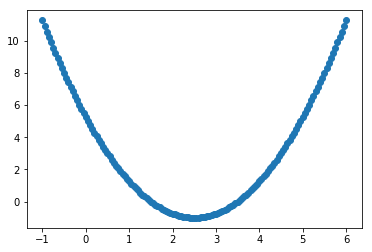

In [9]:
# 构造损失函数的值
plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.5) ** 2 - 1
plt.scatter(plot_x, plot_y)
plt.show()

In [79]:
# 损失函数的导数
def dJ(theta):
    return 2 * theta - 5

In [80]:
# 损失函数
def J(theta):
    return (theta - 2.5)**2 - 1

In [22]:
theta = 0
eta = 0.1
epsilon =  1e-8
theta_history = []
while True:
    gradient = dJ(theta)
#     last_theta = theta
    theta = theta - gradient * eta 
    theta_history.append(theta)
    if abs(gradient) < epsilon: # 可能由于浮点数精度、步长等原因，梯度是达不到0的
#     if abs(last_theta - theta) < epsilon:       
        break

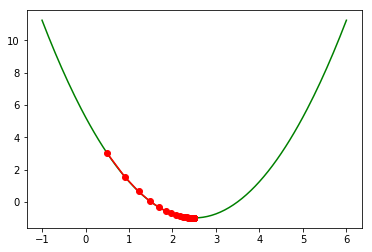

In [29]:
plt.plot(plot_x, plot_y, color = 'green')
plt.plot(np.array(theta_history), J(np.array(theta_history)), color = 'r', marker = 'o')
plt.show()

In [35]:
# 封装为函数

def gradient_decent(initial_theta, eta, epsilon =  1e-8):
    theta_history = []
    theta = initial_theta
    theta_history.append(theta)
    while True:
        gradient = dJ(theta)
        theta = theta - gradient * eta 
        theta_history.append(theta)
        if abs(gradient) < epsilon:  
            return theta, theta_history

def plot_decent(theta_history):
    plt.plot(plot_x, J(plot_x), color = 'green')
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color = 'r', marker = '+')
    plt.show()   

In [36]:
theta, theta_history = gradient_decent(initial_theta=0, eta = 0.01)

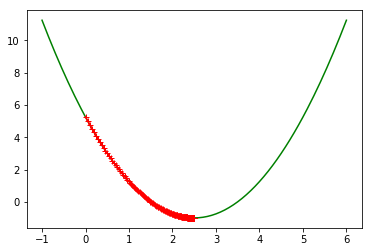

In [37]:
plot_decent(theta_history)

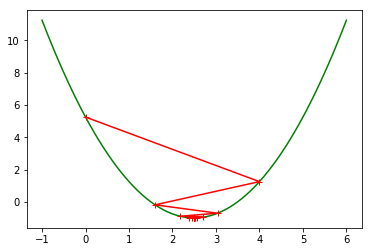

In [38]:
# 当eta的值比较大的时候
theta, theta_history = gradient_decent(initial_theta=0, eta = 0.8)
plot_decent(theta_history)

In [62]:
# 当eta太大的时候，程序会陷入一个循环，修改一下程序
def gradient_decent(initial_theta, eta, n_iters = 1e4, epsilon =  1e-8):
    theta_history = []
    theta = initial_theta
    theta_history.append(theta)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta)
        theta = theta - gradient * eta 
        theta_history.append(theta)
        if abs(gradient) < epsilon:  
            return theta, theta_history
        i_iter += 1
    return theta, theta_history

In [61]:
gradient_decent(initial_theta=0, eta=1.1)

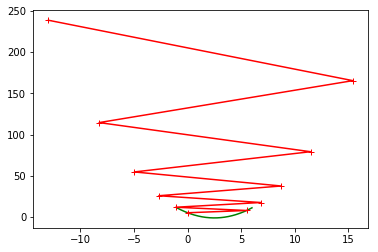

In [66]:
theta, theta_history = gradient_decent(initial_theta=0, eta=1.1, n_iters=10)
plot_decent(theta_history)

这里需要注意的是，用梯度Gradient作为衡量标准是不安全的（对于比较复杂的算法，我们也许会对梯度做标准化处理），并且梯度主要还是表示方向。因此code可以写为以下更为准确：

In [81]:
def gradient_decent(initial_theta, eta, n_iters = 1e4, epsilon =  1e-8):
    theta_history = []
    theta = initial_theta
    theta_history.append(theta)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - gradient * eta 
        theta_history.append(theta)
        if abs(J(theta) - J(last_theta)) < epsilon:  
            return theta, theta_history
        i_iter += 1
    return theta, theta_history

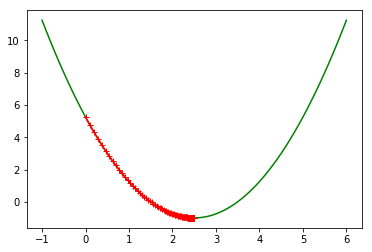

In [82]:
theta, theta_history = gradient_decent(initial_theta=0, eta=0.02)
plot_decent(theta_history)

### 3. 线性回归中的梯度下降法

对于高维的数据而言，也可以用梯度下降法表示（如图，是个二维特征的梯度下降）。
![](https://pythonmachinelearning.pro/wp-content/uploads/2017/09/GD-v-SGD.png)

线性回归的梯度为：  

\begin{equation}
\begin{aligned}
\nabla J(\theta) = \begin{bmatrix}
\frac{\partial J}{\partial \theta_0}  \\
\frac{\partial J}{\partial \theta_1}   \\  
\cdots  \\
\frac{\partial J}{\partial \theta_n} \\
\end{bmatrix}
\end{aligned}
\end{equation}

即：

\begin{equation}
\nabla J(\theta) = \frac{1}{m}\begin{bmatrix}
\sum_{i=1}^{m}2\left(y^{(i)} - X^\left(i\right) \theta\right)(-1) \\
\sum_{i=1}^{m}2\left(y^{(i)} - X^\left(i\right) \theta\right)(-X_1^\left(i\right))  \\
\sum_{i=1}^{m}2\left(y^{(i)} - X^\left(i\right) \theta\right)(-X_2^\left(i\right))   \\  
\cdots  \\
\sum_{i=1}^{m}2\left(y^{(i)} - X^\left(i\right) \theta\right)(-X_n^\left(i\right)) \\
\end{bmatrix}
\end{equation}

写成向量形式：
\begin{equation}
\nabla J(\theta) = \frac{2}{m}(X_b \theta - y)^T \cdot X_b 
\end{equation}

由于这个梯度显然与总样本量m有关，因此我们除以m，也就是我们的目的是使得$\frac{1}{m}\sum_{i=1}^{m}(y^i- (\hat y^i) ^2)$最小，这个值其实就是MSE。  
有时候我们也将这个$J(\theta)$写为：$\frac{1}{2m}\sum_{i=1}^{m}(y^i- (\hat y^i) ^2)$。（为了求导方便）



In [108]:
np.random.seed(1)
x = 2 * np.random.random(size = 100)
y = 3 * x + 4 + np.random.normal(0, 1, size=100)

In [109]:
X = x.reshape(-1,1)

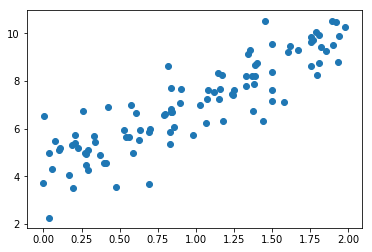

In [110]:
plt.scatter(x, y)
plt.show()

In [111]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2)/len(X_b)
    except:
        return float('inf')

In [112]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [180]:
# 这里非常需要注意的是：theta = theta - gradient * eta 和 last_theta = theta这两句，要么这么写
# 要么写成theta -= gradient * eta 和last_theta = np.array(theta)
# theta -= eta * gradient 只是修改当前 theta 指向的向量的内存；这样last_theta和theta的指向是一致的，两者的值就会一样

def gradient_decent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon =  1e-8):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - gradient * eta 
        
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:  
            break
        i_iter += 1
        
    return theta

In [172]:
# 初始参数
X_b = np.hstack([np.ones((len(x), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.1

In [164]:
theta = gradient_decent(X_b, y, initial_theta=initial_theta, eta=eta)

In [165]:
print(theta)

[4.23625499 2.84306749]


In [257]:
# 对线性回归重新封装
# 并且可以对dJ的方法进行优化
from sklearn.metrics import mean_squared_error
class Linear_Regression:
    
    def __init__(self):
        self.coef_ = None
        self.interception_ = None
        self._theta = None
    
    def fit_normal(self, X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0], "The size of X_train and y_train must be same!"
        
        X_b = np.hstack([np.ones(shape=(len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    
    def fit_gd(self, X_train, y_train, eta=0.01, n_iters=1e4):
        assert X_train.shape[0] == y_train.shape[0], "The size of X_train and y_train must be same!"
        
        def J(theta, X_b, y_train):
            try:
                return np.sum((y_train - X_b.dot(theta)) ** 2)/len(X_b)
            except:
                return float('inf')
        
        def dJ(theta, X_b, y_train):
#             res = np.empty(len(theta))
#             res[0] = np.sum(X_b.dot(theta) - y_train)
#             for i in range(1, len(theta)):
#                 res[i] = (X_b.dot(theta) - y_train).dot(X_b[:,i])
#             return res * 2 / len(X_b)          
            return X_b.T.dot(X_b.dot(theta) - y_train) * 2. / len(y_train)
        
        def gradient_decent(X_b, y_train, initial_theta, eta, n_iters, epsilon =  1e-8):
            theta = initial_theta
            i_iter = 0
            while i_iter < n_iters:
                gradient = dJ(theta, X_b, y_train)
                last_theta = theta
                theta = theta - gradient * eta 

                if abs(J(theta, X_b, y_train) - J(last_theta, X_b, y_train)) < epsilon:  
                    break
                i_iter += 1

            return theta        
        
        X_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_decent(X_b, y_train, initial_theta, eta, n_iters)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
        
    def predict(self, X_test):
        assert self.interception_ is not None and self.coef_ is not None, \
        "You must fit before predict!"
        assert len(self.coef_) == X_test.shape[1], \
        "The feature number of X_predict must be the same with X_train!"
        
        X_b = np.hstack([np.ones(shape=(len(X_test), 1)), X_test])
        return X_b.dot(self._theta)
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return 1 - mean_squared_error(y_pred, y_test) / np.var(y_test)
        
    def __repr__(self):
        return "LinearRegression()"

### 4. 梯度下降法的向量化与数据标准化

In [298]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y<50]
y = y[y<50]

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [300]:
lin_reg = Linear_Regression()
lin_reg.fit_gd(X_train, y_train, eta=0.01)

/Users/yingli/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/yingli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/Users/yingli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars
/Users/yingli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in multiply


LinearRegression()

我们可以看到数据溢出了，coef_也都是NA。

In [237]:
lin_reg.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

为了避免溢出，我们试一下更小的eta。

In [301]:
lin_reg = Linear_Regression()
lin_reg.fit_gd(X_train, y_train, eta=0.000001)
print(lin_reg.coef_)

[-0.08013155  0.11517177 -0.07984426  0.00393761  0.00463072  0.12345948
  0.05198335  0.0366704  -0.0034035   0.00247463  0.11499532  0.04601549
 -0.23323785]


我们可以看到这样是没有溢出的，但是当我们看score时：

In [302]:
lin_reg.score(X_test, y_test)

0.28476903593033576

可以看到score非常低，还没有达到损失函数的最小值。所以需要循环更多次：

In [303]:
%%time
lin_reg = Linear_Regression()
lin_reg.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)
print(lin_reg.coef_)

[-7.21800814e-02  5.07877012e-02 -8.59696901e-02  2.65890753e-01
  2.20006938e-01  4.09741274e+00  2.16101212e-03 -5.16599297e-01
  1.05931304e-01 -9.08396803e-03 -2.01364871e-02  1.62596687e-02
 -3.70349450e-01]
CPU times: user 49.8 s, sys: 255 ms, total: 50.1 s
Wall time: 52.4 s


In [304]:
lin_reg.score(X_test, y_test)

0.7419495395724334

In [305]:
# 但是如果我们用数学解计算的话，score可以达到0.73：
lin_reg = Linear_Regression()
lin_reg.fit_normal(X_train, y_train)
print(lin_reg.score(X_test, y_test))

0.7706603159214309


这说明当我们用了这么长的时间成本，但是损失函数仍然没有达到最小值。

在梯度下降法之前，由于存在变量eta，如果数值不在一个维度上，可能由于数据太大而导致结果不收敛，也有可能因为数据太小导致搜索过程太慢。但是如果先进行***数据归一化***，就可以解决这个问题。

In [189]:
from sklearn.preprocessing import StandardScaler

In [246]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler()

In [249]:
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [250]:
%%time
lin_reg = Linear_Regression()
lin_reg.fit_gd(X_train_standard, y_train)
print(lin_reg.score(X_test_standard, y_test))

0.7359945262675184
CPU times: user 274 ms, sys: 3.79 ms, total: 277 ms
Wall time: 293 ms


### 5. 梯度下降法的优势

当特征数大于样本量并且矩阵很大时，梯度下降法的运行时间比数学计算的时间要更短。

In [254]:
# 构造数据

m = 1000
n = 5000

big_X = np.random.normal(size = (m, n))
true_theta = np.random.uniform(0, 100, size=n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0, 10, size=m)

In [255]:
big_reg1 = Linear_Regression()
%time big_reg1.fit_normal(big_X, big_y)

CPU times: user 22.2 s, sys: 842 ms, total: 23.1 s
Wall time: 16.8 s


LinearRegression()

In [258]:
big_reg2 = Linear_Regression()
%time big_reg2.fit_gd(big_X, big_y)

CPU times: user 9.97 s, sys: 176 ms, total: 10.1 s
Wall time: 5.85 s


LinearRegression()

可以看到梯度下降法速度是更快的。

### 6. 随机梯度下降法

上面所实现的方法，其实是批量梯度下降法(batch gradient decent)。但是这种方式速度比较慢(样本量很大)，我们还可以用随机梯度下降法 (stochastic gradient decent)。 

 之前是使用的所有样本去进行的梯度下降(所有求和然后再除以样本总量m):
\begin{equation}
\nabla J(\theta) = \frac{2}{m}\begin{bmatrix}
\sum_{i=1}^{m}\left(X^\left(i\right) \theta - y^{(i)}\right)(X_0^\left(i\right)) \\
\sum_{i=1}^{m}\left(X^\left(i\right) \theta - y^{(i)}\right)(X_1^\left(i\right))  \\
\sum_{i=1}^{m}\left(X^\left(i\right) \theta - y^{(i)}\right)(X_2^\left(i\right))   \\  
\cdots  \\
\sum_{i=1}^{m}\left(X^\left(i\right) \theta - y^{(i)}\right)(X_n^\left(i\right)) \\
\end{bmatrix}
\end{equation}


那如果将求和和除以样本量这个步骤去掉可以得到（这时候已经不是损失函数了）：

\begin{equation}
2\begin{bmatrix}
\left(X^\left(i\right) \theta - y^{(i)}\right)(X_0^\left(i\right)) \\
\left(X^\left(i\right) \theta - y^{(i)}\right)(X_1^\left(i\right))  \\
\left(X^\left(i\right) \theta - y^{(i)}\right)(X_2^\left(i\right))   \\  
\cdots  \\
\left(X^\left(i\right) \theta - y^{(i)}\right)(X_n^\left(i\right)) \\
\end{bmatrix}
\end{equation}

相当于我们每次只取一行样本计算，当成是搜索的方向。
![](https://img2018.cnblogs.com/blog/1499410/201908/1499410-20190807140538943-79289106.jpg)

如上图所示，由于不能保证每次得到的方向是损失函数减小的方向，所以搜索路径是曲折的。即使如此，我们通常可以找到损失函数最小值的附近。但是样本总量m非常大时，我们原因用一定的精度换取更少的时间。    
 (在随机梯度下降法中，随机梯度下降法是收敛的，θ每次都朝着让一个样本的损失函数损失最小的方向迈进一步，最终达到最小值。)  
在之前的批量梯度下降中，学习率是个固定值。但是在随机梯度下降中，假如当快到最小值时，由于每次样本是随机的，那么可能又会跳出最小值。因此我们可以设定随着循环的增加，学习率逐渐减小（如上图右侧所示，a与b就是随机梯度下降的超参数）。  
这里的理解：https://coding.imooc.com/learn/questiondetail/205813.html

In [271]:
m = int(1e5)
x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4 * x + 3 + np.random.normal(0, 3, size=m)

In [259]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.dot(X_b_i.dot(theta) - y_i) * 2.

In [268]:
def sgd(X_b, y, initial_theta, n_iters):
    t0 = 5  # 经验上比较好的两个超参
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    
    return theta

In [274]:
%%time

X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])

theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3) # 循环1/3个样本个数

CPU times: user 775 ms, sys: 9.03 ms, total: 784 ms
Wall time: 919 ms


In [275]:
theta

array([2.95572632, 4.01849231])

#### 6.1 SGD的实现

In [326]:
# 重新封装线性回归算法

# 对线性回归重新封装
# 并且可以对dJ的方法进行优化
from sklearn.metrics import mean_squared_error
class Linear_Regression:
    
    def __init__(self):
        self.coef_ = None
        self.interception_ = None
        self._theta = None
    
    def fit_normal(self, X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0], "The size of X_train and y_train must be same!"
        
        X_b = np.hstack([np.ones(shape=(len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    
    def fit_gd(self, X_train, y_train, eta=0.01, n_iters=1e4):
        assert X_train.shape[0] == y_train.shape[0], "The size of X_train and y_train must be same!"
        
        def J(theta, X_b, y_train):
            try:
                return np.sum((y_train - X_b.dot(theta)) ** 2)/len(X_b)
            except:
                return float('inf')
        
        def dJ(theta, X_b, y_train):
#             res = np.empty(len(theta))
#             res[0] = np.sum(X_b.dot(theta) - y_train)
#             for i in range(1, len(theta)):
#                 res[i] = (X_b.dot(theta) - y_train).dot(X_b[:,i])
#             return res * 2 / len(X_b)          
            return X_b.T.dot(X_b.dot(theta) - y_train) * 2. / len(y_train)
        
        def gradient_decent(X_b, y_train, initial_theta, eta, n_iters, epsilon =  1e-8):
            theta = initial_theta
            i_iter = 0
            while i_iter < n_iters:
                gradient = dJ(theta, X_b, y_train)
                last_theta = theta
                theta = theta - gradient * eta 

                if abs(J(theta, X_b, y_train) - J(last_theta, X_b, y_train)) < epsilon:  
                    break
                i_iter += 1

            return theta        
        
        X_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_decent(X_b, y_train, initial_theta, eta, n_iters)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    
    def fit_sgd(self, X_train, y_train, n_iters=5, t0=5, t1=50):
        assert X_train.shape[0] == y_train.shape[0], "The size of X_train and y_train must be same!"
        
        def dJ_sgd(theta, X_b_i, y_i):
            return X_b_i.dot(X_b_i.dot(theta) - y_i) * 2.
        
        def sgd(X_b, y, initial_theta, n_iters, t0, t1):
            def learning_rate(t):
                return t0 / (t + t1)

            theta = initial_theta
            m = len(X_b)

            for cur_iter in range(n_iters): # 遍历整个样本
                indexes = np.random.permutation(m)
                X_b_new = X_b[indexes] # 乱序处理，为了loop到每一个样本点
                y_new = y[indexes]
                for i in range(m):
#                 rand_i = np.random.randint(m)
                    gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
                    theta = theta - learning_rate(cur_iter * m + i) * gradient

            return theta
    
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = sgd(X_b, y_train, initial_theta, n_iters, t0, t1)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self
              
    def predict(self, X_test):
        assert self.interception_ is not None and self.coef_ is not None, \
        "You must fit before predict!"
        assert len(self.coef_) == X_test.shape[1], \
        "The feature number of X_predict must be the same with X_train!"
        
        X_b = np.hstack([np.ones(shape=(len(X_test), 1)), X_test])
        return X_b.dot(self._theta)
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return 1 - mean_squared_error(y_pred, y_test) / np.var(y_test)
        
    def __repr__(self):
        return "LinearRegression()"

In [327]:
# 数据
m = int(1e5)
x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4 * x + 3 + np.random.normal(0, 3, size=m)

In [328]:
lin_reg = Linear_Regression()
lin_reg.fit_sgd(X, y, n_iters=2)

LinearRegression()

In [329]:
lin_reg.coef_

array([3.99883783])

In [330]:
lin_reg.interception_

3.02220940110476

In [331]:
# 真实数据

boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y<50]
y = y[y<50]

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [333]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [336]:
lin_reg = Linear_Regression()
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=2)
lin_reg.score(X_test_standard, y_test)

CPU times: user 9.21 ms, sys: 1.94 ms, total: 11.1 ms
Wall time: 9.75 ms


0.7198567551324055

In [348]:
lin_reg = Linear_Regression()
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=100)
lin_reg.score(X_test_standard, y_test)

CPU times: user 298 ms, sys: 5.17 ms, total: 303 ms
Wall time: 327 ms


0.7668389195483917

#### 6.2 sklearn中SGD
注意只能解决线性模型。  
并且，sklearn中的实现方式并不相同，做了很多优化，时间要更短。

In [349]:
from sklearn.linear_model import SGDRegressor

In [350]:
sgd_reg = SGDRegressor() # n_iters默认是5
%time sgd_reg.fit(X_train_standard, y_train)  
sgd_reg.score(X_test_standard, y_test)

CPU times: user 4.52 ms, sys: 4.91 ms, total: 9.42 ms
Wall time: 16.3 ms


0.7705490795100273

In [355]:
sgd_reg = SGDRegressor(n_iter_no_change=100) # 默认是5
%time sgd_reg.fit(X_train_standard, y_train)  
sgd_reg.score(X_test_standard, y_test)

CPU times: user 24.8 ms, sys: 14 ms, total: 38.8 ms
Wall time: 90.8 ms


0.7711235135229031